In [1]:
# Auto reload, no need to restart notebook everytime an imported module changes.
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
import seaborn as sns

from plotting import plot_scores, plot_aurocs, plot_quantized_aurocs, plot_pca

sns.set()

import warnings

warnings.filterwarnings("ignore")

In [2]:
# path to up-to-date results
results_file = '../agg_results/classical_graph_properties.csv'

save_dir = 'outputs/graph/classical'

ind_cat_dict = {
    'D&D': 'I-2',
    'ENZYMES': 'I-1',
    'PROTEINS': 'I-2',
    'NCI1': 'I-3',
    'IMDB-BINARY': 'I-3',
    'REDDIT-BINARY': 'I-3',
    'REDDIT-MULTI-5K': 'I-3',
    'COLLAB': 'I-3',
    'MUTAG': 'I-2',
    'NCI109': 'I-3',
    'Synthie': 'I-3',
    'SYNTHETICnew': 'I-3',
    'MNIST': 'I-1',
    'CIFAR10': 'I-1',
    'PATTERN': 'I-3',
    'CLUSTER': 'I-3',
    'MalNetTiny': 'I-2',
    'Small-World': 'I-2',
    'Scale-Free': 'I-2',
    'ogbg-molhiv': 'I-2',
    'ogbg-moltox21': 'I-2',
    'ogbg-molpcba': 'I-2',
    'PPI': 'I-3'
    }
ind_cat_dict = {k: ind_cat_dict[k] for k in sorted(ind_cat_dict)}

In [3]:
df = pd.read_csv(results_file)
datasets = df['Dataset']
df = df.set_index('Dataset')
properties = list(df.columns)
df

,Num. nodes,Num. edges,Density,Connectivity,Diameter,Approx. max clique,Centrality,Cluster. coeff.,Num. triangles
Dataset,,,,,,,,,
IMDB-BINARY (class=0),20.11,96.78,0.559,3.828,1.838,10.30,0.559,0.943,307.73
IMDB-BINARY (class=1),19.43,96.29,0.482,3.388,1.884,10.01,0.482,0.951,476.25
REDDIT-BINARY (class=0),641.25,735.95,0.012,0.556,5.646,3.22,0.012,0.054,35.96
REDDIT-BINARY (class=1),218.00,259.56,0.032,0.423,3.778,2.95,0.032,0.041,13.71
D&D (class=0),341.88,870.23,0.019,1.110,20.843,4.95,0.019,0.479,617.07
D&D (class=1),183.72,449.43,0.040,1.140,17.460,4.79,0.040,0.480,302.55
PROTEINS (class=0),50.00,94.06,0.142,1.196,13.837,3.85,0.142,0.473,34.30
PROTEINS (class=1),22.94,41.52,0.315,1.420,7.278,3.80,0.315,0.575,17.24
NCI1 (class=0),25.65,27.65,0.100,0.924,11.265,2.02,0.100,0.002,0.03


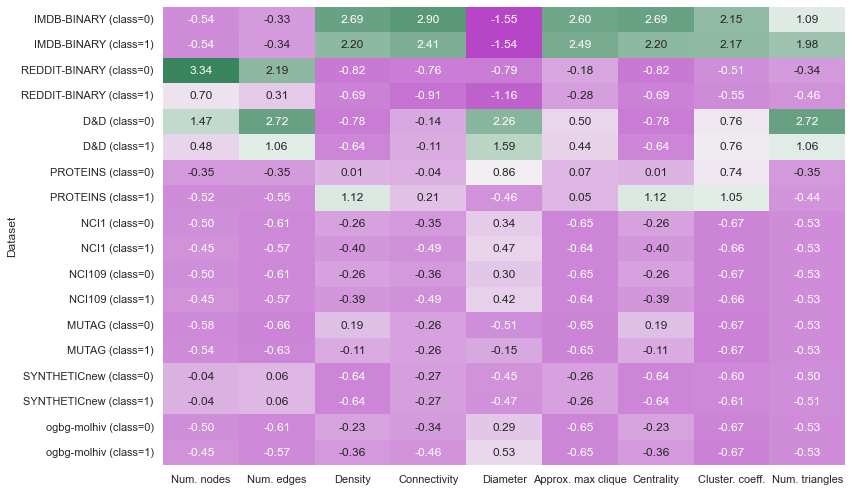

In [4]:
normalized_df = (df - df.mean()) / df.std()
plot_scores(normalized_df, datasets, properties, figsize=(12, 7), save_dir=None)

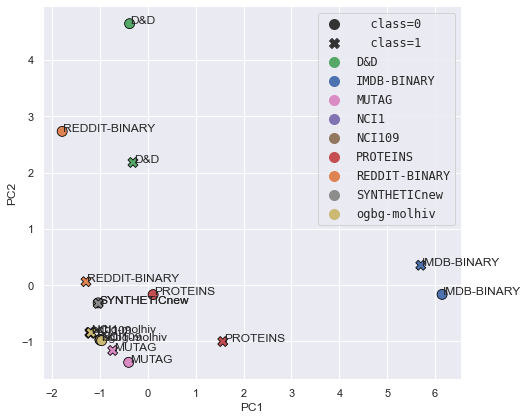

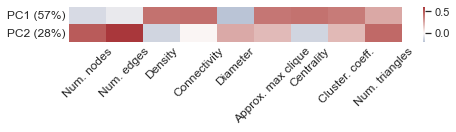

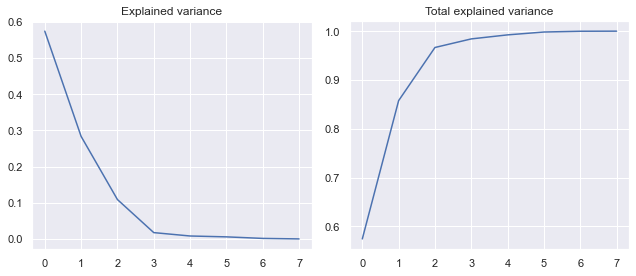

[0.5741501  0.85757969 0.9665228  0.98411835 0.99237703 0.99822964
 0.99981305 1.        ]


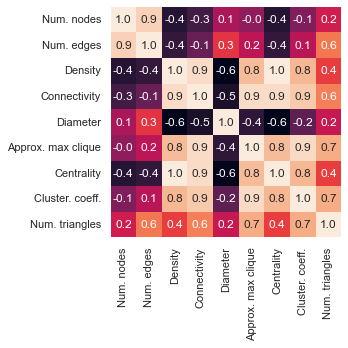

In [5]:
# NOTE!!: Before running you need to temporarily adjust the plot_pca function:
#    1. set in the beginning of the function:  score_diff_mat = score_mat
#    2. edit use of `perturbations[1:]` to `perturbations` so all properties are named properly
color_labels = [s.split(' ')[0] for s in datasets]
style_labels = ['  ' + s.split(' (')[1][:-1] for s in datasets]
plot_pca(normalized_df, color_labels, properties, figsize=(7.5, 6), save_dir=save_dir,
         # pca_xlimit=[-1.8, 1.8], pca_ylimit=[-1.8, 0.5],
         hue=color_labels,
         style=style_labels,
         # palette=palette,
         edgecolor='black',
         s=100)